<a href="https://colab.research.google.com/github/longaresf/Analisis_de_Datos_Ejercicio_de_Regresion_1/blob/main/Francisco_Longares_Ejercicio_de_Regresion_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ejercicio de Regresión 1

In [1]:
# Librerias a importar
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Montar drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 1. Carga de datos:

In [10]:
# Importar DataFrame
path = '/content/drive/MyDrive/Colab Notebooks/Modelos Regresión/dataset/house-prices.csv'
df_csv = pd.read_csv(path, sep=',')
# Imprimir los 5 primeros datos
print(df_csv.head())

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East


## 2. Exploración de datos:

In [11]:
# Visualizamos el DataFrame.
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


##2.1. Limpieza de datos con Python:
##Detección y eliminación de valores duplicados

In [12]:
# Hacemos copia del DataFrame
df=df_csv.copy()
# Buscar datos duplicados
datos_duplicados = df.duplicated()
if datos_duplicados.any():
    print("Cantidad de datos duplicados: ", datos_duplicados.sum())
else:
    print("No se encontró datos duplicados")

No se encontró datos duplicados


In [13]:
# Validar el shape.
print(df.shape)

(128, 8)


## 2.2. Verificamos tipo de dato de columnas.

##Consistencia en valores categóricos

In [15]:
# Verificamos valores únicos en las columas

columnas = ['SqFt', 'Bedrooms', 'Bathrooms', 'Price']

for col in columnas:
    print(f"\nDatos en la columa: '{col}':")
    print(df[col].unique())


Datos en la columa: 'SqFt':
[1790 2030 1740 1980 2130 1780 1830 2160 2110 1730 1870 1910 2150 2590
 2190 1990 1700 1920 2000 1690 1820 2210 2290 1600 2040 2250 1930 2280
 2080 1880 2420 1720 1560 1840 1940 1810 2050 2100 1860 1650 2240 2090
 2200 1610 2220 1450 2140 1950 1900 2410 1520 2010 1970 2440 2060 2260
 2530 1890 1710 2070 2020]

Datos en la columa: 'Bedrooms':
[2 4 3 5]

Datos en la columa: 'Bathrooms':
[2 3 4]

Datos en la columa: 'Price':
[114300 114200 114800  94700 119800 114600 151600 150700 119200 104000
 132500 123000 102600 126300 176800 145800 147100  83600 111400 167200
 116200 113800  91700 106100 156400 149300 137000  99300  69100 188000
 182000 112300 135000 139600 117800 117100 117500 147000 131300 108200
 106600 133600 105600 154000 166500 103200 129800  90300 115900 107500
 151100  91100 117400 130800  81300 125700 140900 152300 138100 155400
 180900 100900 161300 120500 130300 111100 126200 151900  93600 165600
 166700 157600 107300 144200 106900 176500 12130

In [16]:
# Revisamos columna 'SqFt'.
df["SqFt"].value_counts()

,count
SqFt,
2000,5
1920,5
1930,5
1990,4
2150,4
...,...
2530,1
1890,1
1710,1


In [17]:
# Revisamos columna 'Bedrooms'.
df["Bedrooms"].value_counts()

,count
Bedrooms,
3,67
2,30
4,29
5,2


In [18]:
# Revisamos columna 'Bathrooms'.
df["Bathrooms"].value_counts()

,count
Bathrooms,
2,72
3,55
4,1


In [19]:
# Revisamos columna 'Price'.
df["Price"].value_counts()

,count
Price,
103200,2
105600,2
117800,2
129800,2
125700,2
...,...
119700,1
147900,1
113500,1


##2.3. Detección de datos anómalos

In [20]:
# Detectar valores extremos o fuera de rango segun interpretacion de las columnas
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


##3. Preparación de datos

In [22]:
# Separar variables predictoras y objetivo
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##4. Entrenamiento del modelo:

In [23]:
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

##5. Evaluación del modelo:

In [24]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse:.2f}')
print(f'R-cuadrado: {r2:.2f}')

Error Cuadrático Medio: 448551131.88
R-cuadrado: 0.31


##6. Predicción:

In [27]:
# Realizar predicciones
# y_pred = modelo.predict(X_test)

# Datos de la nueva casa
casa_nueva = np.array([[2000, 3, 2]])

# Realizar la predicción
y_pred = modelo.predict(casa_nueva)

print(f'El precio predicho para la casa es: ${y_pred[0]:.2f}')

El precio predicho para la casa es: $124924.52


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Visualización de Resultados

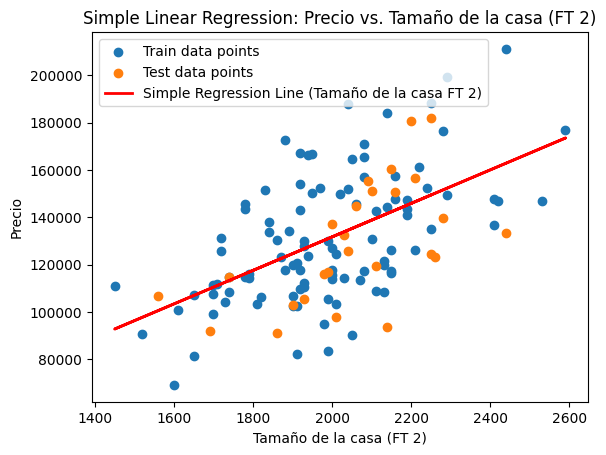

In [30]:
# Perform simple linear regression using only 'SqFt'
X_SqFt = df[['SqFt']]
y_price = df['Price']

X_train_SqFt, X_test_SqFt, y_train_price, y_test_price = train_test_split(X_SqFt, y_price, test_size=0.2, random_state=0)

modelo_price = LinearRegression()
modelo_price.fit(X_train_SqFt, y_train_price)

# Plot the single regression line
plt.scatter(X_train_SqFt, y_train_price, label="Train data points")
plt.scatter(X_test_SqFt, y_test_price, label="Test data points")
plt.plot(X_SqFt, modelo_price.predict(X_SqFt), color='red', linewidth=2, label='Simple Regression Line (Tamaño de la casa FT 2)')
plt.xlabel('Tamaño de la casa (FT 2)')
plt.ylabel('Precio')
plt.title('Simple Linear Regression: Precio vs. Tamaño de la casa (FT 2)')
plt.legend()
plt.show()